# Compare the results

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from functools import partial
import os
from itertools import product
import json

# import functions
from crossover import *
from selection_algos import *
from mutations import *
from algorithms import *
from problems_solutions import *
from utils import *


In [38]:
results = pd.read_csv('ga_results.csv')

In [ ]:
import seaborn as sns

from scipy.stats import shapiro
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import scikit_posthocs as sp

In [39]:
results

,pop_size,mutation,crossover,selection,selection_param,elitism,max_gen,xo_prob,mut_prob,avg_fitness,std_fitness,avg_conv_gen,avg_conv_time,fitness_scores
0,10,swap_mutation,classic_order_crossover,tournament,3.0,True,500,0.8,0.1,57366.666667,3409.529130,467.100000,1.70,"[51700.0, 58500.0, 53800.0, 54300.0, 61200.0, ..."
1,10,swap_mutation,classic_order_crossover,tournament,5.0,True,500,0.8,0.1,58510.000000,3976.795192,462.066667,2.19,"[61200.0, 62900.0, 57700.0, 53900.0, 57700.0, ..."
2,10,swap_mutation,classic_order_crossover,tournament,7.0,True,500,0.8,0.1,58416.670000,4161.180000,472.070000,2.76,"[52300.0, 57900.0, 61700.0, 55100.0, 59000.0, ..."
3,10,swap_mutation,classic_order_crossover,tournament,3.0,True,500,0.8,0.2,64893.330000,2921.070000,469.070000,1.71,"[59300.0, 62100.0, 68700.0, 61300.0, 63800.0, ..."
4,10,swap_mutation,classic_order_crossover,tournament,5.0,True,500,0.8,0.2,64870.000000,3811.570000,467.570000,2.22,"[54700.0, 63100.0, 63700.0, 67300.0, 63200.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,10,inversion_mutation,classic_order_crossover,tournament,5.0,True,500,0.8,0.3,47770.000000,3977.870000,426.900000,2.90,"[45400.0, 52400.0, 50200.0, 51700.0, 51400.0, ..."
717,10,inversion_mutation,classic_order_crossover,tournament,7.0,True,500,0.8,0.3,47413.330000,4602.230000,439.570000,3.50,"[48300.0, 42300.0, 46900.0, 45400.0, 53200.0, ..."
718,10,inversion_mutation,classic_order_crossover,tournament,5.0,True,500,0.7,0.2,44210.000000,4386.140000,423.630000,2.86,"[44700.0, 42600.0, 43000.0, 50600.0, 49500.0, ..."
719,10,inversion_mutation,classic_order_crossover,tournament,7.0,True,500,0.7,0.2,45300.000000,4353.310000,426.630000,3.62,"[47900.0, 40900.0, 39800.0, 42300.0, 51500.0, ..."


In [40]:
fitness_list = json.loads(results.loc[results.index[1], 'fitness_scores'])
fitness_list

[61200.0,
 62900.0,
 57700.0,
 53900.0,
 57700.0,
 60100.0,
 55700.0,
 56600.0,
 49300.0,
 58000.0,
 61600.0,
 61600.0,
 62300.0,
 64400.0,
 59400.0,
 61400.0,
 57400.0,
 57800.0,
 59900.0,
 62900.0,
 53000.0,
 67000.0,
 55400.0,
 52600.0,
 61400.0,
 62300.0,
 57300.0,
 55900.0,
 51800.0,
 56800.0]

# 1.Get top N fitness values

In [147]:
n = 3

In [148]:
top_n = results.sort_values(by="avg_fitness", ascending=False).head(n)
top_n

,pop_size,mutation,crossover,selection,selection_param,elitism,max_gen,xo_prob,mut_prob,avg_fitness,std_fitness,avg_conv_gen,avg_conv_time,fitness_scores
682,50,swap_mutation,classic_order_crossover,tournament,5.0,True,500,0.9,0.2,75410.00,2447.50,397.47,13.52,"[73700.0, 73100.0, 73800.0, 74100.0, 75100.0, ..."
695,50,swap_mutation,classic_order_crossover,tournament,7.0,False,500,0.9,0.2,75006.67,2439.12,402.50,15.34,"[74600.0, 76900.0, 72700.0, 78000.0, 76800.0, ..."
688,50,swap_mutation,classic_order_crossover,tournament,5.0,False,500,0.8,0.2,74993.33,2159.31,417.27,11.53,"[75200.0, 73700.0, 69700.0, 75100.0, 77800.0, ..."


In [133]:
# # Adicionar plot para average fitness
# plt.figure(figsize=(12, 6))
# plt.bar(range(len(top_n)), top_n["avg_fitness"])
# plt.xlabel(f"Top {n} Configurations")
# plt.ylabel("Average Fitness")
# plt.title(f"Top {n} Configurations by Average Fitness")

# plt.ylim(bottom=74000)

# plt.xticks(ticks=range(len(top_n)), labels=range(1, len(top_n) + 1))
# plt.tight_layout()
# plt.show()

# 2. Normality test

> We want to check if the fitness scores over different runs (or other performance metrics such as convergence rate or number of generations to optimal solution) follow a normal distribution. So we can decide on using parametic or non parametic tests for comparison.

> We will use shapiro -wilk test as it's suitable for n<50.

In [ ]:
for i in range(len(top_n)):
    scores_str = top_n['fitness_scores'].iloc[i]
    scores = json.loads(scores_str)
    
    stat, p_value = shapiro(scores)
    
    print(f"Configuration {i+1}: Shapiro-Wilk p-value = {p_value:.4f}")
    
    if p_value < 0.05:
        print("Fitness scores are NOT normally distributed.")
    else:
        print("Fitness scores are normally distributed.")
    print(50*'-')

Configuration 1: Shapiro-Wilk p-value = 0.1986
Fitness scores are normally distributed.
--------------------------------------------------
Configuration 2: Shapiro-Wilk p-value = 0.9008
Fitness scores are normally distributed.
--------------------------------------------------


In [134]:
# # Boxplot para distribuição mas também adicionar gráfico para os vários valores nos vários runs
# fitness_data = []
# for i in range(len(top_n)):
#     scores = json.loads(top_n['fitness_scores'].iloc[i])
#     for s in scores:
#         fitness_data.append({'Configuration': f"{i+1}", 'Fitness Score': s})

# df_plot = pd.DataFrame(fitness_data)


# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_plot, x='Configuration', y='Fitness Score')

# plt.title(f"Fitness Score Distribution per Configuration (Top {n})")
# plt.xlabel("Configuration Index")
# plt.ylabel("Fitness Score")
# plt.legend()
# plt.tight_layout()
# plt.show()


|       |2 groups|>2 groups|
|-------|--------|---------|
|Normal|student's t|ANOVA|
|Not normal|wilcoxon|kruskal-wallis


# 3. Parametric test

## 3.1 Two groups: Student's t test

> Use Student's t test to determine if there is a significant different between the means of 2 groups.

> H0: The average fitness value is equal.

> Alternative: the average fitness (or other metric) is not equal.

In [139]:
g1 = top_n['fitness_scores'].iloc[0]
g2 = top_n['fitness_scores'].iloc[1]

g1,g2 = json.loads(g1),json.loads(g2)

In [ ]:
t_stat, p_value = stats.ttest_ind(g1,g2)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0: There is a significant difference between the groups.")
else:
    print("Fail to reject H0: There is no significant difference between the groups.")


t-statistic: 0.6285931447867408
p-value: 0.5320832107591179
Fail to reject H0: There is no significant difference between the groups.


## 3.2 More than two groups: ANOVA

> https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

In [ ]:
all_scores = [json.loads(top_n['fitness_scores'].iloc[i]) for i in range(len(top_n))]

In [158]:
f_stat, p_value = stats.f_oneway(*all_scores)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null H0")
else:
    print("Fail to reject the H0: no difference between groups.")


F-statistic: 0.29386364412094024
p-value: 0.7461150291995835
Fail to reject the H0: no difference between groups.


# 4. Non-parametric tests

## 4.1 Two grupos: Wicoxon rank-sum test

In [145]:
g1 = top_n['fitness_scores'].iloc[0]
g2 = top_n['fitness_scores'].iloc[1]

g1,g2 = json.loads(g1),json.loads(g2)

In [ ]:
stat, p_value = mannwhitneyu(g1, g2, alternative='two-sided')

print("Statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the H0: groups differ significantly.")
else:
    print("Fail to reject the H0: no significant difference.")


Statistic: 490.0
p-value: 0.5590557601090498
Fail to reject the H0: no significant difference.


## 4.2 + Two groups: Kruskal-Wallis

> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

> use when comparing more than two groups, and can't assume normality. Groups are independent - which they are since it's different GA configurations.

In [161]:
all_scores = [json.loads(top_n['fitness_scores'].iloc[i]) for i in range(len(top_n))]

stat, p_value = kruskal(*all_scores)

print(f"Kruskal-Wallis H-test statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: At least one configuration has significantly different fitness scores.")
else:
    print("Fail to reject H0: No signficant differences.")

Kruskal-Wallis H-test statistic: 0.4925510509397748
P-value: 0.7817068151138469
Fail to reject H0: No signficant differences.


> This is supposed to only tell us if there's any configuration that has significantly different fitness scores.

> In the case where there aren't significant differences then stick with the configuration with the highest average fitness. 

> H0: todos grupos têm a mesma distribuição
> Se rejeitar h0 então há pelo menos 1 que difere significativamente, mas não nos diz qual. Para isso precisamos de usar o Dunn's test para perceber que grupos é que são signficativamente diferentes uns dos outros. Há diferença significative se <0.05

### 4.2.1 Post-hoc test: Dunn

https://journals.sagepub.com/doi/pdf/10.1177/1536867X1501500117

In [162]:
data = []
for i in range(len(top_n)):
    scores = json.loads(top_n['fitness_scores'].iloc[i])
    for s in scores:
        data.append({'Configuration': i+1, 'Score': s})

df = pd.DataFrame(data)

# Dunn’s post-hoc test with Bonferroni correction
posthoc = sp.posthoc_dunn(df, val_col='Score', group_col='Configuration')
print(posthoc)


          1         2         3
1  1.000000  0.503021  0.605492
2  0.503021  1.000000  0.878220
3  0.605492  0.878220  1.000000


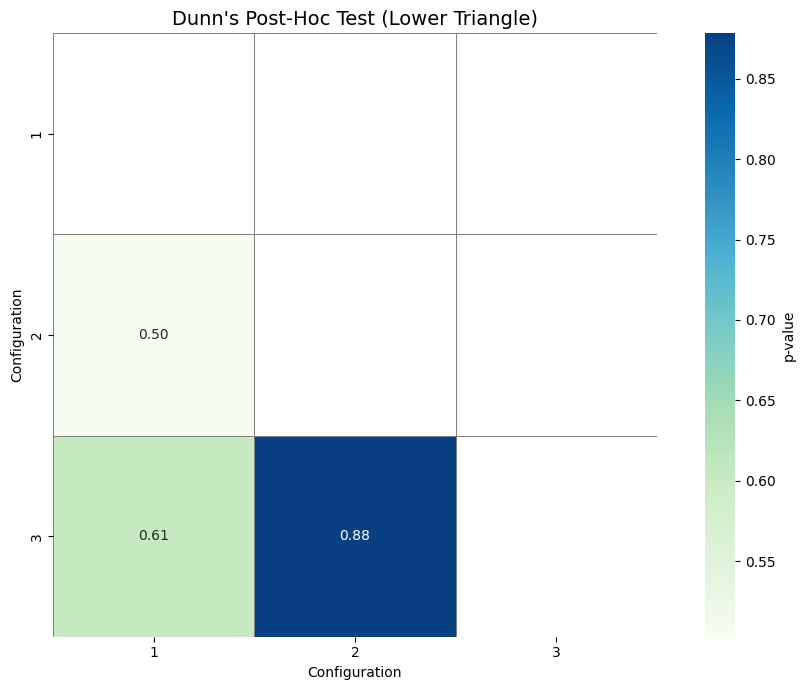

In [168]:
mask = np.triu(np.ones_like(posthoc, dtype=bool))

posthoc_filtered = posthoc.copy()

plt.figure(figsize=(10, 7))

sns.heatmap(posthoc_filtered, 
            mask=mask, 
            cmap="GnBu", 
            annot=True, 
            fmt=".2f", 
            cbar_kws={'label': 'p-value'},
            linewidths=0.5, 
            linecolor='gray',
            cbar=True, 
            square=True)

plt.grid(False)

plt.title("Dunn's Post-Hoc Test (Lower Triangle)", fontsize=14)
plt.xlabel("Configuration")
plt.ylabel("Configuration")
plt.tight_layout()
plt.show()


# 5. Success Rate